# Demonstration of different data visualization techniques

In the python environment, seaborn and matplotlib are two popular libraries for data visualization.

* Bar chart
* Histogram
* Scatter plot (with regression line)
* Heatmap
* More to come...

Addtionally, Plotly is applied to produce interactive plots.

In [31]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

import seaborn as sns
import matplotlib.pyplot as plt
sns.set_theme(style="darkgrid")

**Example 1: Bar Chart**

In [32]:
df_1 = pd.read_csv("Netflix subscription fee Dec-2021.csv")
df_1

,Country_code,Country,Total Library Size,No. of TV Shows,No. of Movies,Cost Per Month - Basic ($),Cost Per Month - Standard ($),Cost Per Month - Premium ($)
0,ar,Argentina,4760,3154,1606,3.74,6.30,9.26
1,au,Australia,6114,4050,2064,7.84,12.12,16.39
2,at,Austria,5640,3779,1861,9.03,14.67,20.32
3,be,Belgium,4990,3374,1616,10.16,15.24,20.32
4,bo,Bolivia,4991,3155,1836,7.99,10.99,13.99
...,...,...,...,...,...,...,...,...
60,ua,Ukraine,5336,3261,2075,5.64,8.46,11.29
61,gb,United Kingdom,6643,4551,2092,7.91,13.20,18.48
62,us,United States,5818,3826,1992,8.99,13.99,17.99
63,uy,Uruguay,4989,3154,1835,8.99,12.99,15.99


In [33]:
df_1.Country

0          Argentina
1          Australia
2            Austria
3            Belgium
4            Bolivia
           ...      
60           Ukraine
61    United Kingdom
62     United States
63           Uruguay
64         Venezuela
Name: Country, Length: 65, dtype: object

In [34]:
df_1['Country'] = df_1['Country'].replace('United States', 'USA')

In [35]:
df_1['Country'] = df_1['Country'].replace('United Kingdom', 'UK')

In [36]:
df_1['Country'] = df_1['Country'].replace('South Africa', 'SAfrica')

In [37]:
df_1['Country'] = df_1['Country'].replace('South Korea', 'SKorea')

In [38]:
df_1.Country

0     Argentina
1     Australia
2       Austria
3       Belgium
4       Bolivia
        ...    
60      Ukraine
61           UK
62          USA
63      Uruguay
64    Venezuela
Name: Country, Length: 65, dtype: object

In [39]:
df_1.loc[df_1['Country']=='United States']

,Country_code,Country,Total Library Size,No. of TV Shows,No. of Movies,Cost Per Month - Basic ($),Cost Per Month - Standard ($),Cost Per Month - Premium ($)


In [40]:
from wordcloud import WordCloud

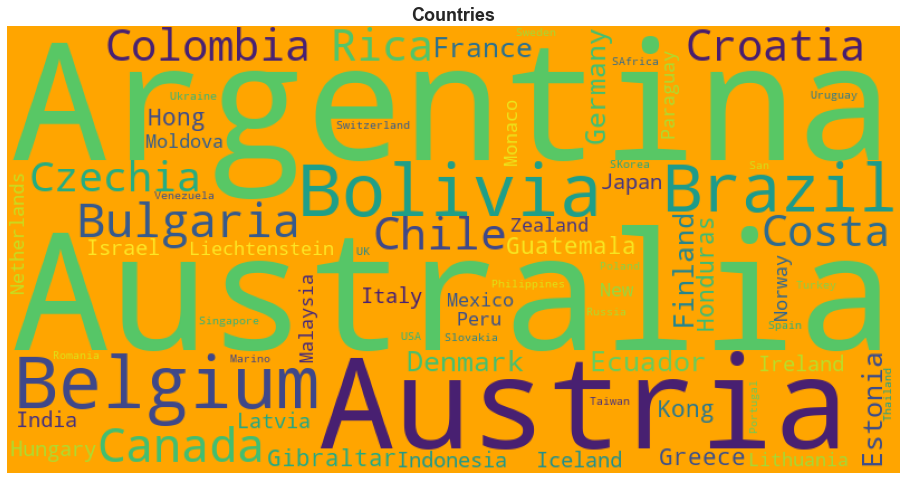

In [41]:
# WORDCLOUD

segment_text = df_1.Country
all_segments = " ".join(segment_text)

wc = WordCloud(background_color="orange", 
               max_words=250, 
               max_font_size=256, 
               random_state=42,
               width=800, height=400)
wc.generate(all_segments)
plt.figure(figsize = (16, 15))
plt.imshow(wc)
plt.title("Countries",fontsize=18,fontweight="bold")
plt.axis('off')
plt.show()

In [42]:
df_new = df_1[['Country', 'Total Library Size']]
df_new.set_index('Country', inplace=True)
df_new.head()

,Total Library Size
Country,
Argentina,4760
Australia,6114
Austria,5640
Belgium,4990
Bolivia,4991


In [43]:
# TREEMAP

fig = px.treemap(df_new,
                 path=[df_new.index], 
                 values='Total Library Size', 
                 width=900, 
                 height=600)
fig.update_layout(title="Countries",
                  title_x = 0.5, title_font = dict(size=18),
                 )
fig.update_layout(margin = dict(t=50, l=25, r=25, b=25))
fig.show()

In [44]:
df_2 = pd.read_csv("netflix price in different countries.csv")
df_2

,Country,Total Library Size,No. of TV Shows,No. of Movies,Cost Per Month - Basic ($),Cost Per Month - Standard ($),Cost Per Month - Premium ($)
0,Argentina,4760,3154,1606,3.74,6.30,9.26
1,Austria,5640,3779,1861,9.03,14.67,20.32
2,Bolivia,4991,3155,1836,7.99,10.99,13.99
3,Bulgaria,6797,4819,1978,9.03,11.29,13.54
4,Chile,4994,3156,1838,7.07,9.91,12.74
...,...,...,...,...,...,...,...
60,Ireland,6486,4515,1971,9.03,14.67,20.32
61,Switzerland,5506,3654,1852,12.88,20.46,26.96
62,Australia,6114,4050,2064,7.84,12.12,16.39
63,Denmark,4558,2978,1580,12.00,15.04,19.60


A horizontally stacked bar chart is shown below.

In this example, there are 3 suscription plans for Netflix, the preimum plan costs the most, and the basic plan costs the least. Imagine you're drawing on a canvas, you draw the background first, and then you draw the details that appear in the front. So, plot the "Cost Per Month - Premium" first, and then the "Standard", lastly, the "Basic".

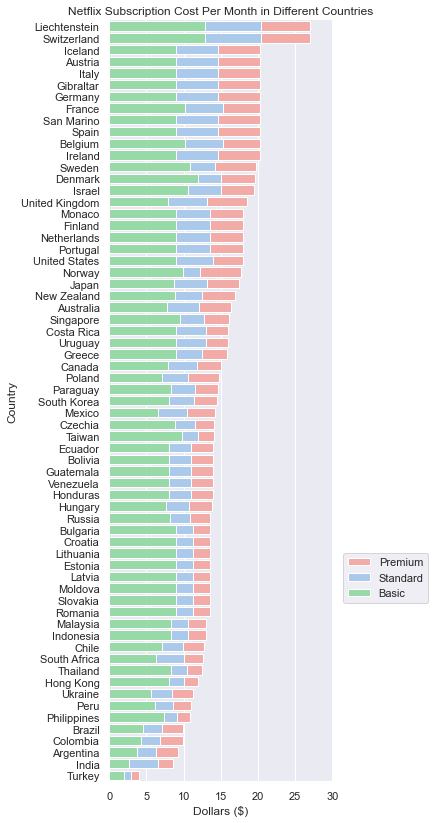

In [45]:
f, ax = plt.subplots(figsize=(4,14))

cost_basic_sort = df_2.sort_values("Cost Per Month - Premium ($)", ascending=False)

# Plot the cost of 3 different plans in different countries in descending order
sns.set_color_codes("pastel")
sns.barplot(x="Cost Per Month - Premium ($)", y="Country", data=cost_basic_sort,
            label="Premium", color="r")
    
#sns.set_color_codes("pastel")
sns.barplot(x="Cost Per Month - Standard ($)", y="Country", data=cost_basic_sort,
            label="Standard", color="b")

#sns.set_color_codes("pastel")
sns.barplot(x="Cost Per Month - Basic ($)", y="Country", data=cost_basic_sort,
            label="Basic", color="g")

# Add a legend and informative axis label
ax.legend(bbox_to_anchor=(1.05, 0.3), loc='upper left', borderaxespad=0.) # (x, y) = (1.05, 0.3)
ax.set(title="Netflix Subscription Cost Per Month in Different Countries",
       xlabel="Dollars ($)", xlim=(0,30))
sns.despine(left=True, bottom=True)
#despine(): remove the top and right spines from plot(s).

If the full list is shown, the figure becomes too long and hard to interpret. Let's take out the top 10 and bottom 10.

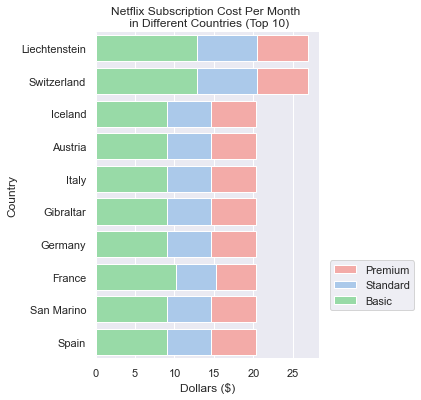

In [46]:
f, ax = plt.subplots(figsize=(4,6))

# no point to show all
cost_basic_sort = df_2.sort_values("Cost Per Month - Premium ($)", ascending=False).head(10)

# Plot the cost of 3 different plans in different countries in descending order
sns.set_color_codes("pastel")
sns.barplot(x="Cost Per Month - Premium ($)", y="Country", data=cost_basic_sort,
            label="Premium", color="r")
    
#sns.set_color_codes("pastel")
sns.barplot(x="Cost Per Month - Standard ($)", y="Country", data=cost_basic_sort,
            label="Standard", color="b")

#sns.set_color_codes("pastel")
sns.barplot(x="Cost Per Month - Basic ($)", y="Country", data=cost_basic_sort,
            label="Basic", color="g")

# Add a legend and informative axis label
ax.legend(bbox_to_anchor=(1.05, 0.3), loc='upper left', borderaxespad=0.) # (x, y) = (1.05, 0.3)
ax.set(title="Netflix Subscription Cost Per Month \n in Different Countries (Top 10)",
       xlabel="Dollars ($)",)
sns.despine(left=True, bottom=True)
#despine(): remove the top and right spines from plot(s).

It's clear the top 10 countries are all in Europe, and the basic fee is at least 10 dollars.

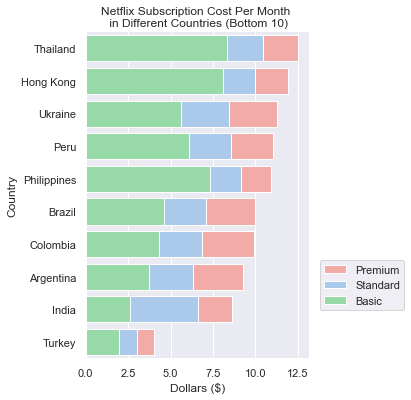

In [47]:
f, ax = plt.subplots(figsize=(4,6))

# no point to show all
cost_basic_sort  = df_2.sort_values("Cost Per Month - Premium ($)", ascending=False).tail(10)

# Plot the cost of 3 different plans in different countries in descending order
sns.set_color_codes("pastel")
sns.barplot(x="Cost Per Month - Premium ($)", y="Country", data=cost_basic_sort,
            label="Premium", color="r")
    
#sns.set_color_codes("pastel")
sns.barplot(x="Cost Per Month - Standard ($)", y="Country", data=cost_basic_sort,
            label="Standard", color="b")

#sns.set_color_codes("pastel")
sns.barplot(x="Cost Per Month - Basic ($)", y="Country", data=cost_basic_sort,
            label="Basic", color="g")

# Add a legend and informative axis label
ax.legend(bbox_to_anchor=(1.05, 0.3), loc='upper left', borderaxespad=0.) # (x, y) = (1.05, 0.3)
ax.set(title="Netflix Subscription Cost Per Month \n in Different Countries (Bottom 10)",
       xlabel="Dollars ($)")
sns.despine(left=True, bottom=True)
#despine(): remove the top and right spines from plot(s).

This figure shows that Turkey is obviously paying a lot less for the Basic plan, the fee is less than the half of that in any of the top 10 countries. Even for the Premium plan, users in these countries are paying a lot less.

In addition, most of the bottom 10 countries are either in Asia or South America, except for Ukraine.

As a Netflix user myself, I know that different shows are avilable in different countries, that's why some people use VPN to access shows that are not available in their geographical region.

Let's check if fewer shows are available in the bottom 10 countries, especially Turkey.

*Application of Pandas plot with Matplotlib*

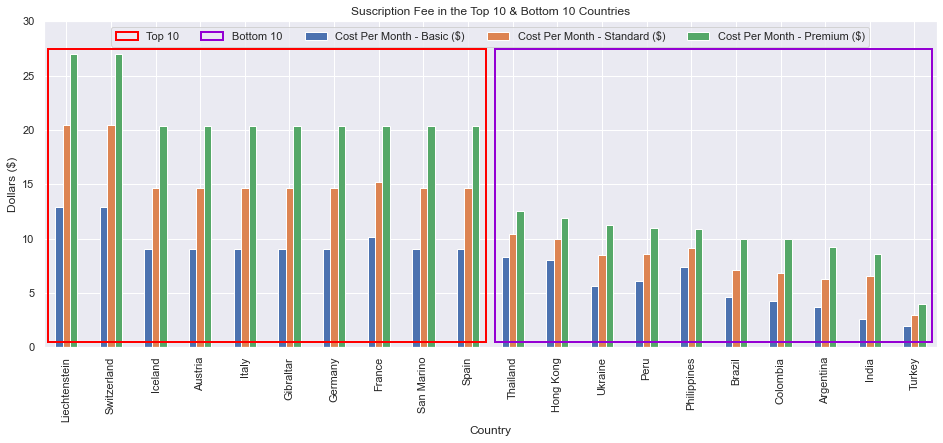

In [48]:
cost_basic_sort = df_2.sort_values("Cost Per Month - Premium ($)", ascending=False)
df = cost_basic_sort.copy()
df3 = df.head(10).append(df.tail(10)) # put the 2 dataframes together for easier comparison
df3.plot(x="Country", y=["Cost Per Month - Basic ($)","Cost Per Month - Standard ($)","Cost Per Month - Premium ($)"], kind="bar", figsize=(16,6))
plt.title("Suscription Fee in the Top 10 & Bottom 10 Countries")
plt.ylabel("Dollars ($)")
plt.ylim(0,30)

from matplotlib.patches import Rectangle

# add a rectanglar patch to separate the top 10 and bottom 10 countries
# Rectangle(xy, width, height, angle=0.0, **kwargs)
rect = Rectangle((-0.4,0.5), 9.8, 26.9, edgecolor ='red', fill=False, linewidth=2, label="Top 10")
rect2 = Rectangle((9.6,0.5), 9.8, 26.9, edgecolor ='darkviolet', fill=False, linewidth=2, label="Bottom 10")
plt.gca().add_patch(rect)
plt.gca().add_patch(rect2)

plt.legend(loc='upper center', ncol=5)

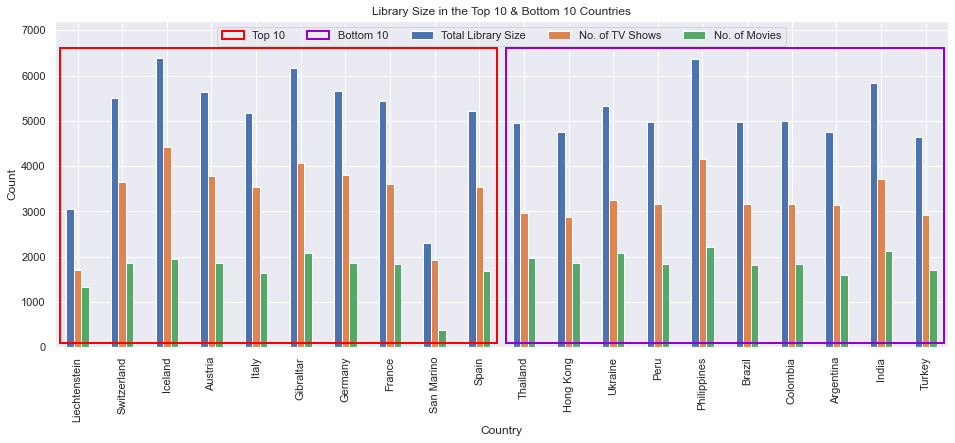

In [49]:
cost_basic_sort = df_2.sort_values("Cost Per Month - Premium ($)", ascending=False)
df = cost_basic_sort.copy()
df3 = df.head(10).append(df.tail(10))
df3.plot(x="Country", y=["Total Library Size","No. of TV Shows","No. of Movies"], kind="bar", figsize=(16,6))
plt.title("Library Size in the Top 10 & Bottom 10 Countries")
plt.ylabel("Count")
plt.ylim(0,7200)

# add a rectanglar patch to separate the top 10 and bottom 10 countries
# Rectangle(xy, width, height, angle=0.0, **kwargs)
rect = Rectangle((-0.4,100), 9.8, 6500, edgecolor ='red', fill=False, linewidth=2, label="Top 10")
rect2 = Rectangle((9.6,100), 9.8, 6500, edgecolor ='darkviolet', fill=False, linewidth=2, label="Bottom 10")
plt.gca().add_patch(rect)
plt.gca().add_patch(rect2)
plt.legend(loc='upper center', ncol=5)

The above bar charts show that the relationship between suscription fee and library size is not strong. Anyway, it is very strange that San Marino has a significantly small no. of movies. Also, the overall library size is small in San Marino and Liechtenstein. While Liechtenstein is paying the most for Netflix, it seems very unfair for the users of that region to have the smallest library size.

**Example 2: Histogram**

In [50]:
from sklearn import datasets

diabetes = datasets.load_diabetes()
X = diabetes.data
y = diabetes.target
# target: quantitative measure of disease progression one year after baseline
feature_names = diabetes.feature_names
train_X = pd.DataFrame(data=X, columns=feature_names)

*Application of Seaborn for multi-plot*

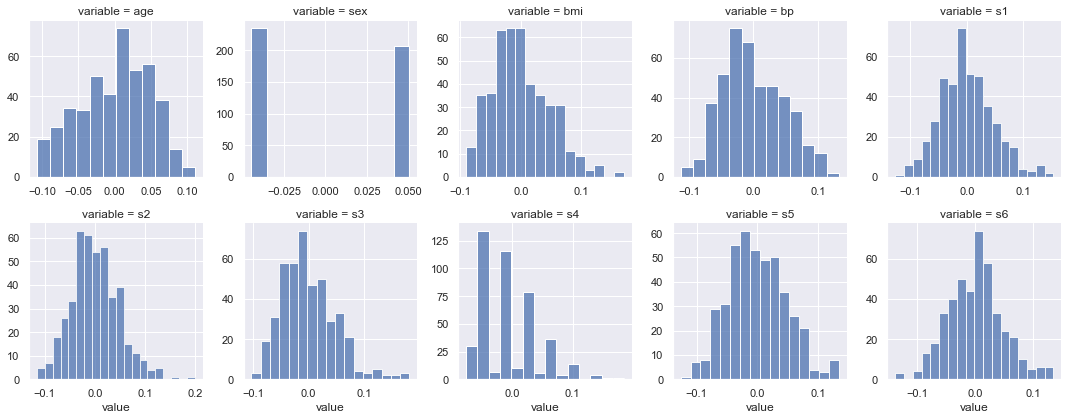

In [51]:
temp = pd.melt(train_X, value_vars=feature_names)
grid = sns.FacetGrid(temp, col="variable", col_wrap=5 , height=3.0, 
                     aspect=1.0, sharex=False, sharey=False)
grid.map(sns.histplot, "value")
plt.show()

**Example 3: Linear Regression Line**

A set of housing price data is used. Pre-processing steps are not explained here.

In [52]:
train = pd.read_csv("train.csv", index_col='Id')

num_columns = train.select_dtypes(include=np.number).columns
corr_features = train[num_columns].corr().sort_values('SalePrice', ascending=False).loc['SalePrice'].sort_values(ascending=False)
imp_feature=corr_features[1:11] # top 10 correlated numerical variables

train['GarageYrBlt'] = train['GarageYrBlt'].fillna(0) # fill in missing entries
#train[list(imp_feature.index)].info() # check to ensure that there are no missing entries

y=train["SalePrice"] = np.log1p(train["SalePrice"])
train = train[list(imp_feature.index)]
feature_names = list(imp_feature.index)

*Application of matplotlib for multi-plot*

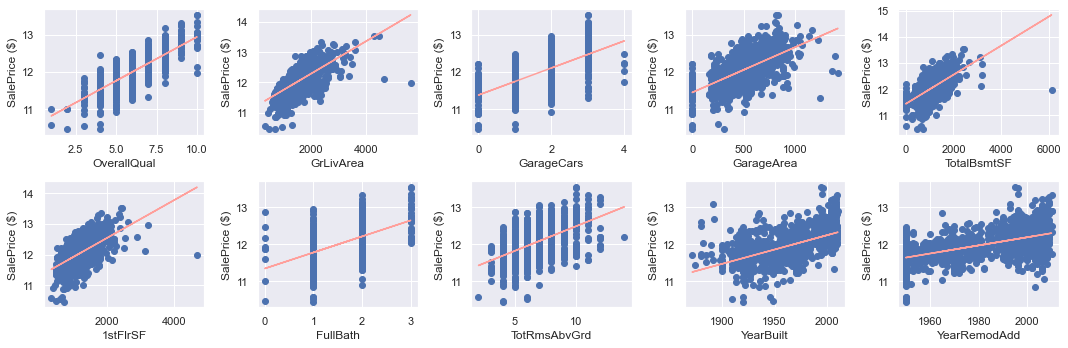

In [53]:
fig, ax = plt.subplots(2, 5, figsize=(15,5))
for i, ax in enumerate(ax.flatten()):
    m, b = np.polyfit(x=train[feature_names[i]], y=y, deg=1)
    ax.plot(train[feature_names[i]], m*train[feature_names[i]] + b, c='r')
    ax.scatter(train[feature_names[i]], y)
    ax.set_ylabel('SalePrice ($)')
    ax.set_xlabel(feature_names[i])
    plt.tight_layout()

From the above multi-plot, some variables contain outliers, and a linear relationship can be observe in numerical variables. Also, it seems that the "real" numerical variables (GrLivArea: gross living area, Garage Area, TotalBsmtSF: total basement squared feet, etc.) have a considerable standard deviation.

**Example 4: Heatmap for displaying the correlation matrix**

[Text(0.5, 1.0, 'Correlation Matrix')]

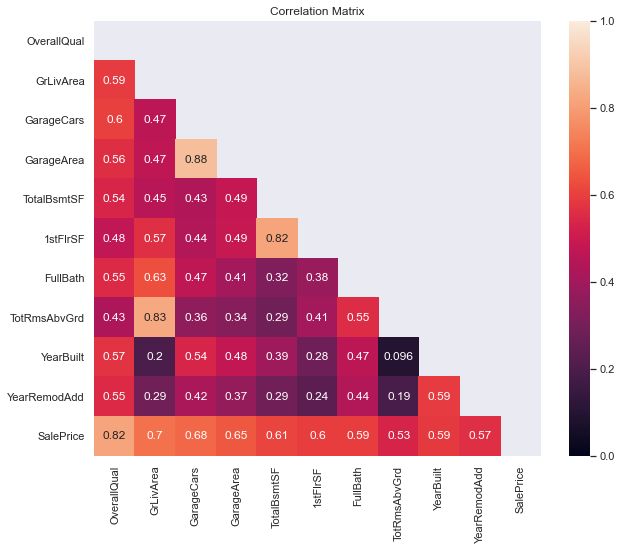

In [54]:
train['SalePrice'] = y # put SalePrice back in the dataframe
num_columns = train.select_dtypes(include=np.number).columns

# np.triu: upper triangle of an array.
matrix = np.triu(train[num_columns].corr())

# can use np.tril() to see the difference
# np.tril: lower triangle of an array.
# matrix = np.triu(train[num_columns].corr())

f, ax = plt.subplots(figsize=(10,8))
ax = sns.heatmap(train[num_columns].corr(), annot=True, mask=matrix, vmax=1, vmin=0)
ax.set(title="Correlation Matrix")
# use mask to hide the upper triangle

**Example 5: Scatter Plot**

*Application of Plotly*

Try different interactive functions that can be selected at the upper right corner of the plot.

Let's try looking at the "GrLivArea" where outliers are obvious in GrLivArea > 4000.

In [55]:
import plotly.express as px

train['SalePrice'] = np.expm1(train['SalePrice'])
#np.log1p() for log transformation
#np.expm1() to un-log

fig = px.scatter(train, x="GrLivArea", y="SalePrice", color="SalePrice",
                title="Gross Living Area with respect to the Sale Price",
                width=800, height=600)

fig.show()